Weather Dataset

This dataset is a weather dataset from 2021 in Wisconsin. It contains data from a multitude of weather stations throughout Wisconsin. We chose this set to determine the question of how does the amount of percipitation in a day effect the depth of snow. As well as the question of how many days in a year was snow possible according to the average temperature. These are important

In [137]:
##Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [138]:
##Read the CSV file and
wdf = pd.read_csv('WiscoWeather.csv')
wdf.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,TAVG,WESD,WESF,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
0,US1WIDL0018,"ELDORADO 2.3 S, WI US",2021-01-01,NaN,NaN,0.00,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1WIDL0018,"ELDORADO 2.3 S, WI US",2021-01-02,NaN,NaN,0.00,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1WIDL0018,"ELDORADO 2.3 S, WI US",2021-01-03,NaN,NaN,0.00,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1WIDL0018,"ELDORADO 2.3 S, WI US",2021-01-04,NaN,NaN,0.00,0.0,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1WIDL0018,"ELDORADO 2.3 S, WI US",2021-01-05,NaN,NaN,0.02,0.3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
##clean data by removing unnecessary columns
wdf = wdf.drop(['DAPR', 'MDPR', 'WESD', 'WESF', 'WT01','WT02','WT03','WT04','WT05','WT06','WT08','WT09','WT11', 'SNOW'], axis=1)

In [140]:
wdf.head()

,STATION,NAME,DATE,PRCP,SNWD,TAVG
0,US1WIDL0018,"ELDORADO 2.3 S, WI US",2021-01-01,0.00,2.0,NaN
1,US1WIDL0018,"ELDORADO 2.3 S, WI US",2021-01-02,0.00,2.0,NaN
2,US1WIDL0018,"ELDORADO 2.3 S, WI US",2021-01-03,0.00,2.0,NaN
3,US1WIDL0018,"ELDORADO 2.3 S, WI US",2021-01-04,0.00,1.5,NaN
4,US1WIDL0018,"ELDORADO 2.3 S, WI US",2021-01-05,0.02,2.0,NaN


In [141]:
ndf= wdf[['SNWD', 'PRCP']]

In [142]:
ndf.head()

,SNWD,PRCP
0,2.0,0.00
1,2.0,0.00
2,2.0,0.00
3,1.5,0.00
4,2.0,0.02


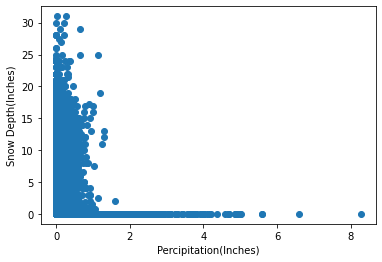

In [143]:
plt.scatter(ndf['PRCP'], ndf['SNWD'])
plt.xlabel('Percipitation(Inches)')
plt.ylabel('Snow Depth(Inches)')
plt.show()

In [144]:
tdf = wdf.drop(['SNWD'], axis=1)
tdf = tdf.dropna()
tdf = tdf.drop_duplicates(['DATE'])

In [145]:
tdf['PBSN'] = np.where(tdf['TAVG'] < 32, True, False)


In [146]:
tdf['PBSN'].value_counts()

PBSN
False    281
True      84
Name: count, dtype: int64